2022-11-11-Jung-Archetypes-Analytical-Project-Text-Mining-I-II (Work in progress last updated on November 16, 2022 by PAX)

The Jung Archetypes Analytical Project (JAAP)
<br>
This is a part of the Jung Archetypes Analytical Project where the hypothesis is that having enough data and crunching power one can make an inference engine useful in social dynamic environments.
As  the idea of Jungs archetypes is fairly universal, it could be applied to a brand, and may be also effective as a tool for other knowledge actors  focusing on the knowledge efforts(such as academia etc). 
<br>
This hypothesis is a proposition made as a basis for reasoning, without any assumption of truth. A supposition made on the basis of limited knowledge and evidence as a starting point for further investigation.

In other words: this is a modest beginner adventure in the AI world where i will build a tool using textanalysis for Jung archetypes analysis. 
<br>
Thanks to the editorial team at towardsai.net and Philip Suraman.

# <b>Text Mining</b>

##### Abstract
In this blogpost I will describe and summarizes some basic concepts in text mining. Examples are text preprocessing steps using the NLTK, including tokenization, stemming, lemmatization, POS tagging, named entity recognition, and chunking.
<br>

The programming environment is: Linux, Python/Jupyter Lab, pandas, numpy and nltk (Natural Language Tool Kit)

### Text Mining
Q: What is Text Mining? 
<br>
A: Text Mining is the process of deriving meaningful information from natural language text.

Today only 20 percent of the data is being generated in structured format as spoken language.
Which means 80% is generated by various means of text, like tweets, WhatsApp, Email, Facebook, Instagram, or any text messages etc. 
And the majority of this data exists in a textual form often mentioned as "unstructured format".


Communicating and sharing information, this is where the concepts of language come into the picture.

### Natural Language Processing (NLP)
Q: What is NLP? 
<br>
A: Natural Language Processing(NLP) is a field in of computer science and artificial intelligence which deals with human language.

There are many languages in the world and each language has its own standards and alphabets - each language has a combination of words arranged which results in the formation of a sentence a human kan understand. 
Each language has its own rules to develop sentences and these sets of rules are also known as grammar.

In order to produce meaningful insights from the text data, we need to follow a method called Text Analysis. Natural Language Processing is a component of text mining that performs a special kind of linguistic analysis (Text Analysis) that essentially helps a machine interpret text and create context.

It uses different methodologies to decipher language ambiguities in human language and we will go through this processes step-by-step using Python.

First, we need to install the NLTK library that is the Natural Language Toolkit for building Python programs to work with human language data, and it also provides a easy to use interface.

## Terminologies in NLP
Tokenization

Tokenization is the first step in NLP. It is the process of breaking strings into tokens, which in turn are small structures or units. Tokenization involves three steps, which are breaking a complex sentence into words, understanding the importance of each word with respect to the sentence, and finally produce a structural description on an input sentence.

In [58]:
#Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
#import nltk.corpus    # Corpus is an already made text from NLTK, I am not using that - making my own instead.
text = 'In Scandinavia they drive on the right-hand side of the road. Scandinavia has a large coastline on both the eastern and western side'


In [59]:
#LookupError: 
#**********************************************************************
#  Resource punkt not found.
# SOLUTION to ERROR:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pa-on-
[nltk_data]     vajert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
token

['In',
 'Scandinavia',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Scandinavia',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'both',
 'the',
 'eastern',
 'and',
 'western',
 'side']

From the above output, we can see the text split into tokens. Words, comma, punctuations are called tokens.

## Finding frequency distinct in the text

In [66]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(token)
#fdist
fdist

FreqDist({'the': 3, 'Scandinavia': 2, 'on': 2, 'side': 2, 'In': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'of': 1, 'road': 1, ...})

‘the’ is found 3 times in the text, 'Scandinavia' is found 2 times in the text, etc.

In [67]:
# To find the frequency of top 10 words
fdistmost = fdist.most_common(10)
fdistmost

[('the', 3),
 ('Scandinavia', 2),
 ('on', 2),
 ('side', 2),
 ('In', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('of', 1),
 ('road', 1)]

## Stemming
Stemming usually refers to normalizing words into its base form or root form.

Here, we have words waited, waiting, and waits. Here the root word is ‘wait.’ 
<br>
There are two methods in Stemming: Porter Stemming (removes common morphological and inflectional endings from words) and Lancaster Stemming (a more aggressive stemming algorithm).

In [71]:
# Importing Porterstemmer from nltk library
# Checking for the word ‘erupting’ 
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem('erupting')

'erupt'

In [73]:
# Checking for the list of words
stm = ['erupted', 'erupting', 'erupts']
for word in stm :
   print(word+ ":" +pst.stem(word))

erupted:erupt
erupting:erupt
erupts:erupt


In [75]:
# Importing LancasterStemmer from nltk
# Using the word ‘giving’ 
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ['giving', 'given', 'given', 'gave']
for word in stm :
 print(word+ ':' +lst.stem(word))

giving:giv
given:giv
given:giv
gave:gav


## Lemmatization

In simpler terms, it is the process of converting a word to its base form. The difference between stemming and lemmatization is that lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care,’ whereas stemming would cutoff the ‘ing’ part and convert it into a car.

Lemmatization can be implemented in python by using Wordnet Lemmatizer, Spacy Lemmatizer, TextBlob, Stanford CoreNLP

In [76]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer

# Solution given in errorstack.
#nltk.download('wordnet')
#nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer() 

print('rocks :', lemmatizer.lemmatize('rocks')) 
print('corpora :', lemmatizer.lemmatize('corpora'))

rocks : rock
corpora : corpus


## Stop Words

“Stop words” are the most common words in a language like “the”, “a”, “at”, “for”, “above”, “on”, “is”, “all”. 
<br>
These words do not provide any meaning and are usually removed from texts. We can remove these stop words using nltk library.

In [77]:
import nltk
nltk.download('stopwords')

#You can view the list of included stop words in NLTK using the code below:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
#print(stops)

[nltk_data] Downloading package stopwords to /home/pa-on-
[nltk_data]     vajert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


You can do that for different languages, so you can configure for the language you need.

In [11]:
stops = set(stopwords.words('german'))
stops = set(stopwords.words('swedish'))

## Filter stop words nltk

We will use a string (data) as text. Of course you can also do this with a text file as input. If you want to use a text file instead, you can do this:

In [78]:
# Any text here as a txt-file, I have used the lyrics of the song Kashmir by Led Zeppelin.
text = open('/home/pa-on-vajert/2022_IBM_Pandas_SCB_TrV_Notebooks/2022_November_Jung_NLP_Textmining_Jung/led_zeppelin_kashmir.txt').read().lower()   # Led Zeppelin Kashmir Lyrics on a txt-file.

### The program below filters stop words from the data.

In [79]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
data = "I saw the best minds in my generation die from a quick fix in  dark alley streets."
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []

for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

print(wordsFiltered)

['I', 'saw', 'best', 'minds', 'generation', 'die', 'quick', 'fix', 'dark', 'alley', 'streets', '.']


A module has been imported:

In [80]:
from nltk.corpus import stopwords

We get a set of English stop words using the line:

In [15]:
stopWords = set(stopwords.words('english'))
#stopWords = set(stopwords.words('swedish'))

The returned list stopWords contains 179 stop words on my computer.
You can view the length or contents of this array with the lines:

In [81]:
print(len(stopWords))
print(stopWords)

179
{'further', 'my', 'off', 's', 'a', 'myself', 'mustn', 'once', 'why', 'from', 'him', 'very', 'to', "should've", 'what', 'shan', 'shouldn', 'couldn', 'and', 'down', 'our', 'll', 'nor', 'doing', 'as', "you'd", "wasn't", "mustn't", 'should', 'few', 'any', 'but', "you'll", "you've", 'it', 'o', 'itself', 'out', 'ours', 'yourselves', 'its', 'have', 'all', "didn't", "isn't", 'isn', "shan't", 'weren', "it's", 'm', 'had', 'having', 'ain', 'so', 't', 'own', 'these', 'haven', 'their', 'more', 'after', 'wouldn', 'is', 'was', "shouldn't", 'who', 'her', 'here', 'y', 'only', 'there', "don't", 'most', 'yours', 'wasn', 'in', 'above', 'hers', 'against', "weren't", 'me', 'some', 'does', 'same', 'can', 'do', 'over', 'or', 'under', 'theirs', 'did', 'you', 'both', 've', 'this', 'i', 'that', 'until', 'on', 'we', "needn't", "wouldn't", 'at', 'where', 'just', 'then', 'has', 'she', 'been', 'won', 'needn', 'd', "you're", 'them', 'if', 'about', 'how', 'before', "couldn't", 'mightn', 'doesn', 're', 'no', 'yours

We create a new list called wordsFiltered which contains all words which are not stop words.
To create it we iterate over the list of words and only add it if its not in the stopWords list.

In [83]:
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

## Part of speech tagging (POS)

Part-of-speech tagging is used to assign parts of speech to each word of a given text (such as nouns, verbs, pronouns, adverbs, conjunction, adjectives, interjection) based on its definition and its context. There are many tools available for POS taggers, and some of the widely used taggers are NLTK, Spacy, TextBlob, Standford CoreNLP, etc.

In [85]:
#LookupError: 
#  Resource averaged_perceptron_tagger not found.
#  Please use the NLTK Downloader to obtain the resource:
#import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pa-on-vajert/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [86]:
text = 'Elvis Aaron Presley was born on January 8, 1935, in Tupelo, Mississippi, USA, and died August 16, 1977 (aged 42) in Memphis, Tennessee, The cause of death was Heart disease due to a kingly Rock-and-roll living, including banana peanut butter sandwich sandwich, fried ducklings with ice cream a lot of Plum in Madeira.'
#Tokenize the text
tex = word_tokenize(text)
for token in tex:
    print(nltk.pos_tag([token]))

[('Elvis', 'NN')]
[('Aaron', 'NNP')]
[('Presley', 'NN')]
[('was', 'VBD')]
[('born', 'NN')]
[('on', 'IN')]
[('January', 'NNP')]
[('8', 'CD')]
[(',', ',')]
[('1935', 'CD')]
[(',', ',')]
[('in', 'IN')]
[('Tupelo', 'NN')]
[(',', ',')]
[('Mississippi', 'NNP')]
[(',', ',')]
[('USA', 'NNP')]
[(',', ',')]
[('and', 'CC')]
[('died', 'VBD')]
[('August', 'NNP')]
[('16', 'CD')]
[(',', ',')]
[('1977', 'CD')]
[('(', '(')]
[('aged', 'VBN')]
[('42', 'CD')]
[(')', ')')]
[('in', 'IN')]
[('Memphis', 'NN')]
[(',', ',')]
[('Tennessee', 'NN')]
[(',', ',')]
[('The', 'DT')]
[('cause', 'NN')]
[('of', 'IN')]
[('death', 'NN')]
[('was', 'VBD')]
[('Heart', 'NN')]
[('disease', 'NN')]
[('due', 'JJ')]
[('to', 'TO')]
[('a', 'DT')]
[('kingly', 'RB')]
[('Rock-and-roll', 'NN')]
[('living', 'NN')]
[(',', ',')]
[('including', 'VBG')]
[('banana', 'NN')]
[('peanut', 'NN')]
[('butter', 'NN')]
[('sandwich', 'NN')]
[('sandwich', 'NN')]
[(',', ',')]
[('fried', 'VBN')]
[('ducklings', 'NNS')]
[('with', 'IN')]
[('ice', 'NN')]
[('cre

## Named entity recognition

It is the process of detecting the named entities such as the person name, the location name, the company name, the quantities, and the monetary value.

In [87]:
#LookupError: 
#  Resource maxent_ne_chunker not found.
#  Please use the NLTK Downloader to obtain the resource:
#import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to /home/pa-on-
[nltk_data]     vajert/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/pa-on-
[nltk_data]     vajert/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [47]:
import svgling

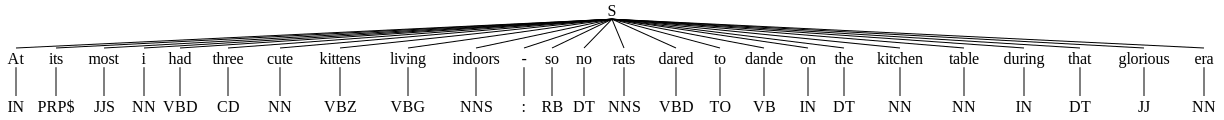

In [88]:
#text = 'Som mest hade jag inneboende tre tre söta missar - så ingen råtta vågade dansa på bordet under den tiden'
text = 'At its most i had three cute kittens living indoors - so no rats dared to dande on the kitchen table during that glorious era '
from nltk import ne_chunk# tokenize and POS Tagging before doing chunk
token = word_tokenize(text)
tags = nltk.pos_tag(token)
chunk = ne_chunk(tags)
chunk

## Chunking
Chunking means picking up individual pieces of information and grouping them into bigger pieces. In the context of NLP and text mining, chunking means a grouping of words or tokens into chunks.

In [89]:
text = 'At its most i had three cute kittens living indoors - so no rats dared to dande on the kitchen table during that glorious era '
token = word_tokenize(text)
tags = nltk.pos_tag(token)
reg = 'NP: {<DT>?<JJ>*<NN>}' 
a = nltk.RegexpParser(reg)
result = a.parse(tags)
print(result)

(S
  At/IN
  its/PRP$
  most/JJS
  (NP i/NN)
  had/VBD
  three/CD
  (NP cute/NN)
  kittens/VBZ
  living/VBG
  indoors/NNS
  -/:
  so/RB
  no/DT
  rats/NNS
  dared/VBD
  to/TO
  dande/VB
  on/IN
  (NP the/DT kitchen/NN)
  (NP table/NN)
  during/IN
  (NP that/DT glorious/JJ era/NN))


<br>
This blog summarizes text preprocessing and covers the NLTK steps, including Tokenization, Stemming, Lemmatization, POS tagging, Named entity recognition, and Chunking.
<br>
<br>
Keep on coding!